In [1]:
from google.colab import drive
drive.mount( '/content/drive' )

Mounted at /content/drive


In [7]:
import time

import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

데이터 불러오기

In [5]:
df_card = pd.read_csv( '/content/drive/MyDrive/학술제 폴더/카드사기 탐지/카드사기 데이터/creditcard.csv' )

In [25]:
feature_selected = [ 'V17', 'V12', 'V14', 'V16', 'V10', 'V11', 'V9', 'V4', 'V7', 'V26', 'V18', 'V21', 'V1', 'V27', 'V15', 'V8', 'V20', 'V3' ]

df_card_selected = df_card[ [ 'V17', 'V12', 'V14', 'V16', 'V10', 'V11', 'V9', 'V4', 'V7', 'V26', 'V18', 'V21', 'V1', 'V27', 'V15', 'V8', 'V20', 'V3' , 'Class' ] ]

In [45]:
### df_card_Major = df_card_train[ df_card_train['Class'] == 0 ]

print(df_card[df_card['Class']==1].shape, df_card[df_card['Class']==0].shape)

(492, 31) (284315, 31)


Train / Test split

데이터 원본 유지를 위한 get_df_copy 함수

In [47]:
def get_df_copy( df ) :

    return df.copy()

train / test dataset

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
def split_train_test_dataset( df ) :

    df_copy = get_df_copy( df )

    X = df_copy.iloc[ : ,  : -1 ]
    y = df_copy.iloc[ : , -1 ]

    # sklearn 라이브러리로 학습용/테스트용으로 데이터셋 분류
    # imbalanced data이기 때문에 strarified 방식을 이용해야 class 분포가 균일하게 나눌 수 있다.
    # random_state : 데이터를 추출할 때의 seed 값. 숫자는 중요하지 않다...?

    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 10, stratify = y )

    return X_train, X_test, y_train, y_test

Classifier Model

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [51]:
KNN_clf = KNeighborsClassifier( n_neighbors = 3 )
svm_clf = SVC( kernel = 'rbf' )
lin_svc_clf = LinearSVC( C = 0.001 )
lr_clf = LogisticRegression()
rf_clf= RandomForestClassifier( n_estimators = 100, max_depth = 10, random_state = 0 )

class ratio 함수

In [52]:
def ratio( alpha ) :

    return int(  394 * 100 / (alpha*100)  )

model eveluate

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix

In [54]:
def get_model_evel( model, feature_train, feature_test, target_train, target_test ) :

    model.fit( feature_train, target_train )
    pred = model.predict( feature_test )

    # Confusion Matrix
    confusion = confusion_matrix( target_test, pred )

    # Accuracy
    accuracy = accuracy_score( target_test, pred )

    # Precision
    precision = precision_score( target_test, pred )

    # Recall
    recall = recall_score( target_test, pred )

    # F1
    f1 = f1_score( target_test, pred )

    return accuracy, precision, recall, f1

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy,precision,recall,f1))

In [55]:
from imblearn.under_sampling import ClusterCentroids

In [56]:
kf = KFold(n_splits=5)
for train, test in kf.split(df_card_selected):
  ###리샘플링 방법 넣기론 넣기 아래는 예시
  print("%s %s" % (train, test))

[ 56962  56963  56964 ... 284804 284805 284806] [    0     1     2 ... 56959 56960 56961]
[     0      1      2 ... 284804 284805 284806] [ 56962  56963  56964 ... 113921 113922 113923]
[     0      1      2 ... 284804 284805 284806] [113924 113925 113926 ... 170882 170883 170884]
[     0      1      2 ... 284804 284805 284806] [170885 170886 170887 ... 227843 227844 227845]
[     0      1      2 ... 227843 227844 227845] [227846 227847 227848 ... 284804 284805 284806]


In [57]:
import statistics as st

In [58]:
ratio=(0.0086523, 0.0173046, 0.0259569, 0.0346092)

X = np.array(df_card_selected.iloc[:, :-1]) # class 열 제외한 feature 열들 모음 -> array 변환
y = df_card_selected['Class']

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
List1=[]
List2=[]
List3=[]
List4=[]
for train_index, test_index in kf.split(df_card_selected):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train=pd.concat([X_train, y_train], axis=1)
    test=pd.concat([X_test, y_test], axis=1)
    df_card_Major = train[ train['Class'] == 0 ]
    df_card_minor = train[ train['Class'] == 1 ]
    train_under_Major, train_under_minor=ClusterCentroids(df_card_Major,df_card_minor, sampling_strategy=0.0086523, random_state=0) 
    train_under=pd.concat([train_under_Major, train_under_minor], axis=1)
    accuracy, precision, recall, f1 = get_model_evel(KNN_clf,train_under_Major[ : , : -1 ],X_test,train_under_minor[ : , -1 ],y_test)
    List1.append(accuracy)
    List2.append(recall)
    List3.append(precision)
    List4.append(f1)
    print('정확도 평균: {0:.4f}, 정밀도 평균: {1:.4f}, 재현율 평균: {2:.4f}, F1 평균: {3:.4f}'.format(st.mean(List1),st.mean(List2),st.mean(List3),st.mean(List4)))
    

    

TypeError: ignored

In [34]:
import statistics as st

my_list = [10, 20, 30, 40, 50, 60]
mean = statistics.mean(my_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


TypeError: ignored

In [20]:
df_card_Major = train[ train['Class'] == 0 ]
df_card_minor = train[ train['Class'] == 1 ]
train_under=ClusterCentroids(df_card_Major, sampling_strategy='auto', random_state=0)
train_under

IndexError: ignored

# Validation

KNN

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
def Validation_KNN( df, iter, alpha ) :

    start_time = time.time()

    df_copy = get_df_copy( df )

    X_train, X_test, y_train, y_test = split_train_test_dataset( df )
    
    df_card_train = pd.concat( [X_train, y_train], axis = 1 )
    df_card_Major = df_card_train[ df_card_train['Class'] == 0 ]
    df_card_minor = df_card_train[ df_card_train['Class'] == 1 ]

    result_f1 = [ ]

    for i in range( iter ) :
        
        df_card_Major_sample = df_card_Major.sample( ratio( alpha ) )

        df_unit = df_card_Major_sample.append( df_card_minor )

        f1_KNN = get_model_evel( KNN_clf, df_unit.iloc[ : , : -1 ], X_test, df_unit.iloc[ : , -1 ], y_test )

        #print( f1_KNN )
        result_f1.append( f1_KNN )
        


    plt.figure( figsize = ( 15, 9 ) )
    plt.plot( [ i+1 for i in range( len(result_f1) ) ], result_f1 )
    plt.xlabel( 'Number of trials' )
    plt.ylabel( 'f1-score' )
    plt.title( 'f1-score of KNN( CR : {A} )'.format( A = alpha ) )
    plt.show()
    print( '평균값 : ', round( statistics.mean( result_f1 ), 4 )  )
    print( '최댓값 : ', round( max( result_f1 ), 4 ), '-->', result_f1.index( max( result_f1 ) ) + 1, '번째 iteration' )
    print( "실행 시간 : ", time.time() - start_time,'sec' )



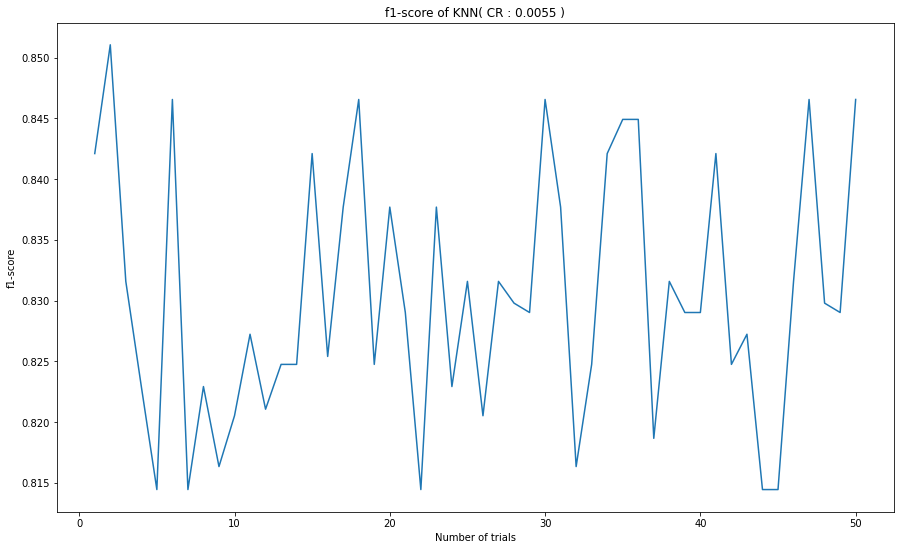

평균값 :  0.8303
최댓값 :  0.8511 --> 2 번째 iteration
실행 시간 :  3053.96955537796 sec


In [ ]:
Validation_KNN( df_card_selected , 50, 0.0055 ) 

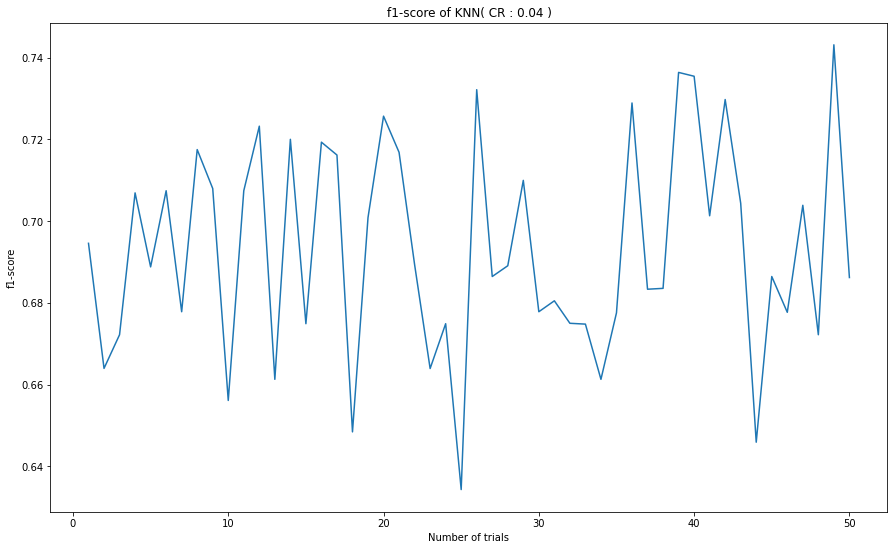

평균값 :  0.6931
최댓값 :  0.7431 --> 49 번째 iteration
실행 시간 :  523.1315040588379 sec


In [ ]:
Validation_KNN( df_card_selected , 50, 0.04 ) 

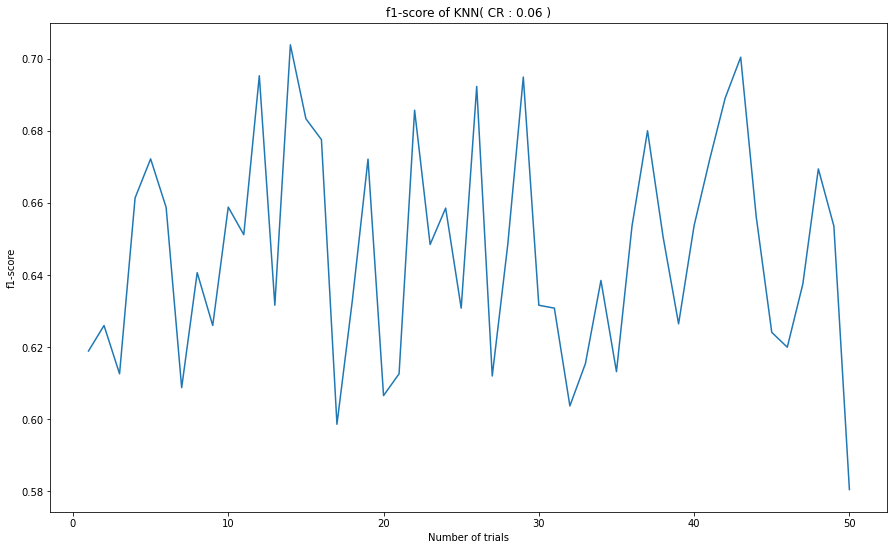

평균값 :  0.6464
최댓값 :  0.7039 --> 14 번째 iteration
실행 시간 :  370.021605014801 sec


In [ ]:
Validation_KNN( df_card_selected , 50, 0.09 ) 

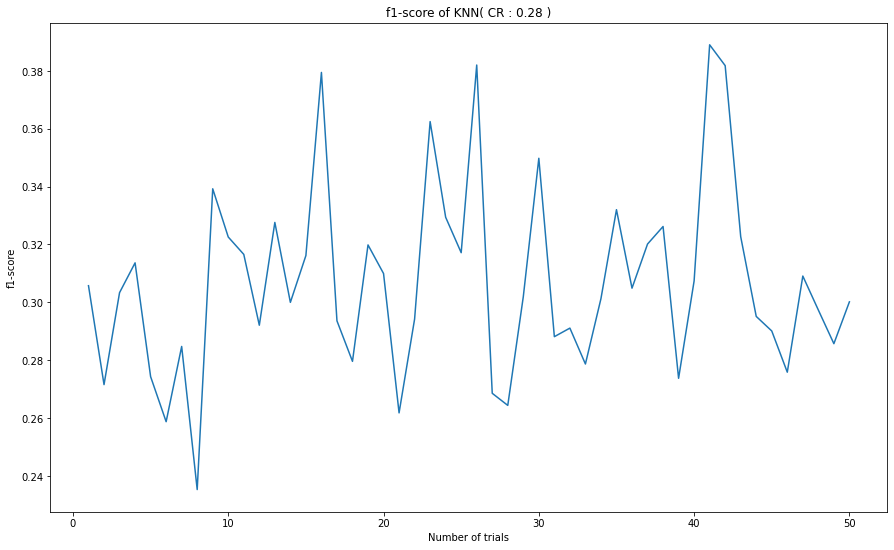

평균값 :  0.3069
최댓값 :  0.389 --> 41 번째 iteration
실행 시간 :  154.40380120277405 sec


In [ ]:
Validation_KNN( df_card_selected , 50, 0.28 )

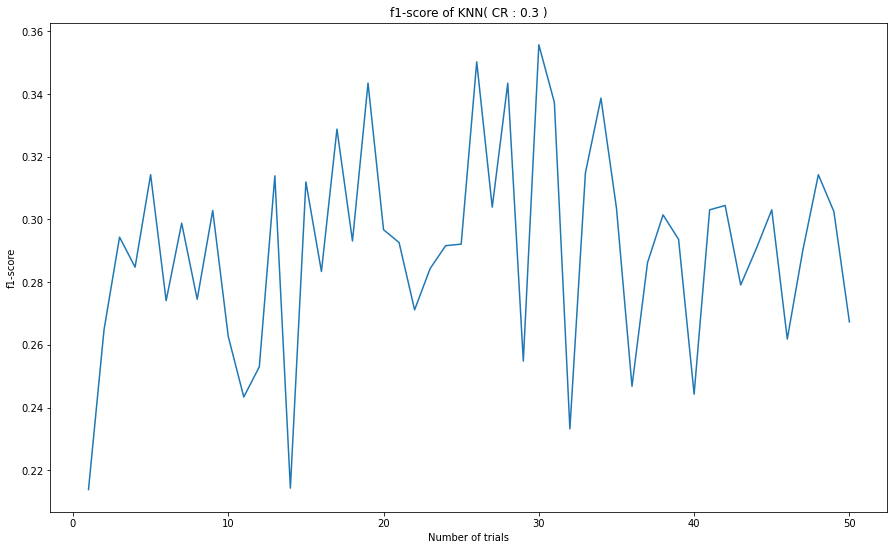

평균값 :  0.2904
최댓값 :  0.3556 --> 30 번째 iteration
실행 시간 :  153.38106513023376 sec


In [ ]:
Validation_KNN( df_card_selected , 50, 0.3 )

LinearSVC

In [ ]:
def Validation_LinearSVC( df, iter, alpha ) :

    start_time = time.time()

    df_copy = get_df_copy( df )

    X_train, X_test, y_train, y_test = split_train_test_dataset( df )
    
    df_card_train = pd.concat( [X_train, y_train], axis = 1 )
    df_card_Major = df_card_train[ df_card_train['Class'] == 0 ]
    df_card_minor = df_card_train[ df_card_train['Class'] == 1 ]

    result_f1 = [ ]

    for i in range( iter ) :
        
        df_card_Major_sample = df_card_Major.sample( ratio( alpha ) )

        df_unit = df_card_Major_sample.append( df_card_minor )

        f1_SVC = get_model_evel( lin_svc_clf, df_unit.iloc[ : , : -1 ], X_test, df_unit.iloc[ : , -1 ], y_test )

        #print( f1_SVC )
        result_f1.append( f1_SVC )
        


    plt.figure( figsize = ( 15, 9 ) )
    plt.plot( [ i+1 for i in range( len(result_f1) ) ], result_f1 )
    plt.xlabel( 'Number of trials' )
    plt.ylabel( 'f1-score' )
    plt.title( 'f1-score of Linear SVC( CR : {A} )'.format( A = alpha ) )
    plt.show()
    print( '평균값 : ', round( statistics.mean( result_f1 ), 4 )  )
    print( '최댓값 : ', round( max( result_f1 ), 4 ), '-->', result_f1.index( max( result_f1 ) ) + 1, '번째 iteration' )
    print( "실행 시간 : ", time.time() - start_time,'sec' )

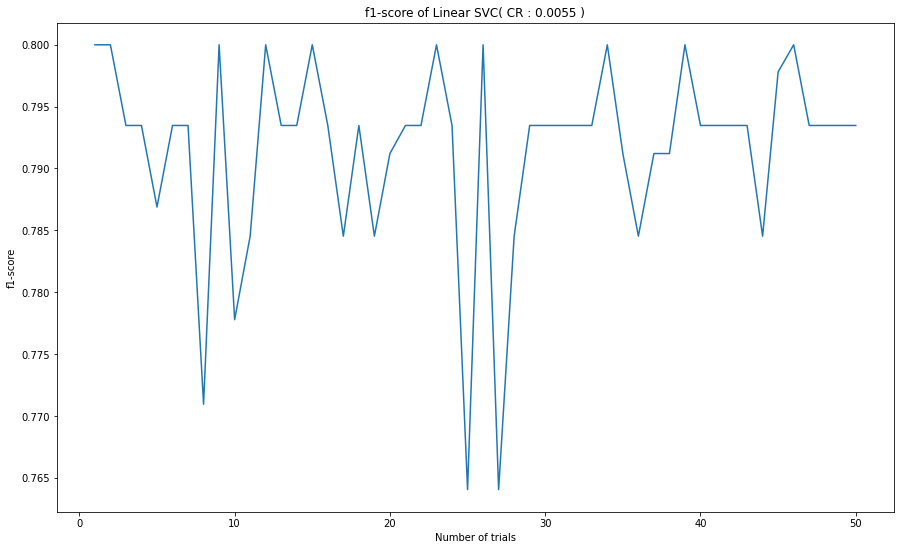

평균값 :  0.7915
최댓값 :  0.8 --> 1 번째 iteration
실행 시간 :  83.3610999584198 sec


In [ ]:
Validation_LinearSVC( df_card_selected , 50, 0.0055 ) 

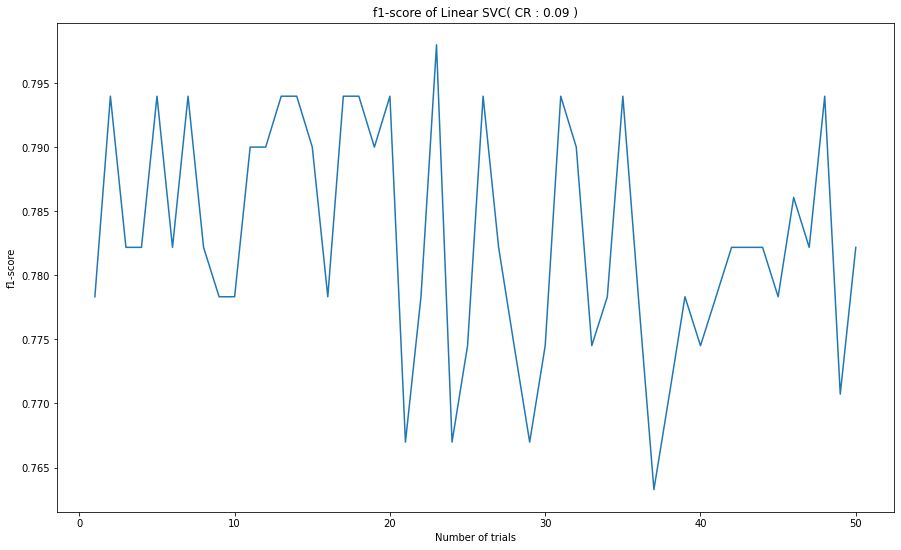

평균값 :  0.7829
최댓값 :  0.798 --> 23 번째 iteration
실행 시간 :  8.48202896118164 sec


In [ ]:
Validation_LinearSVC( df_card_selected , 50, 0.09 ) 

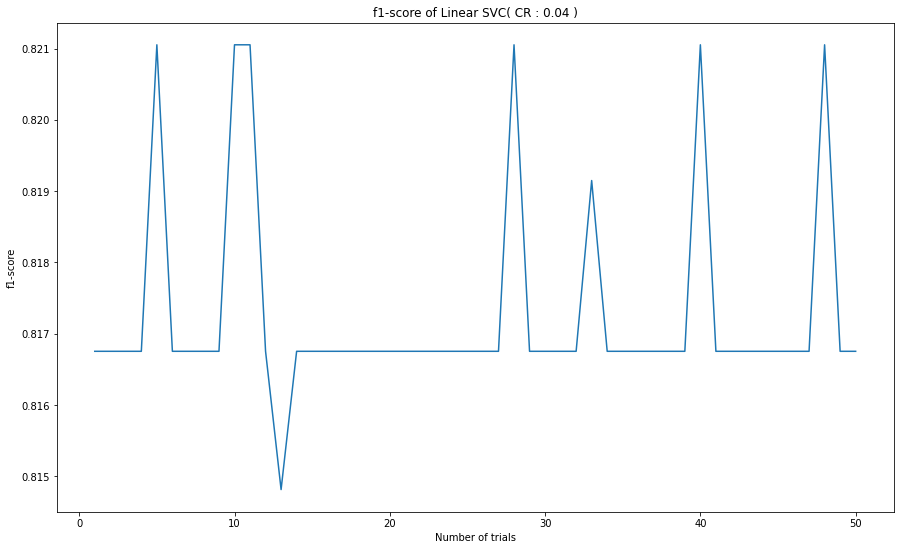

평균값 :  0.8173
최댓값 :  0.8211 --> 5 번째 iteration
실행 시간 :  10.111814975738525 sec


In [ ]:
Validation_LinearSVC( df_card_selected , 50, 0.04 ) 

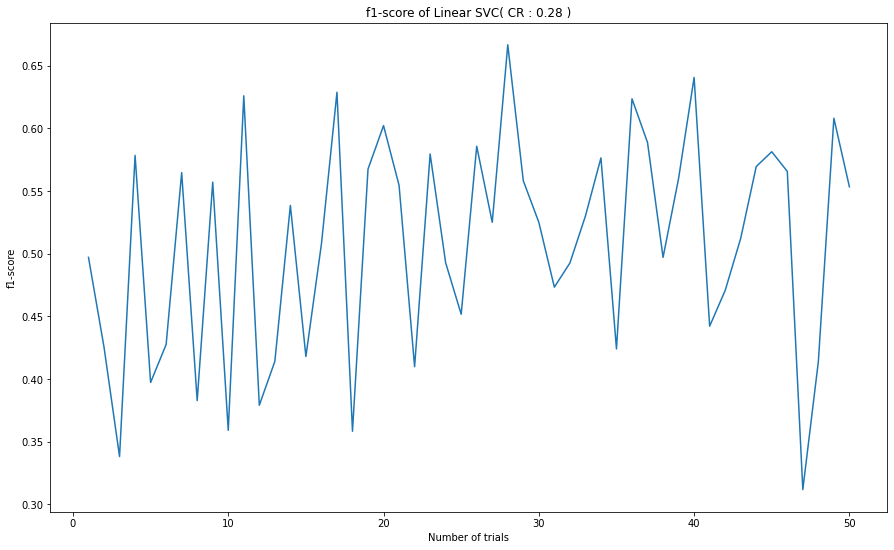

평균값 :  0.507
최댓값 :  0.6667 --> 28 번째 iteration
실행 시간 :  7.360676050186157 sec


In [ ]:
Validation_LinearSVC( df_card_selected , 50,0.28 ) # 0.06

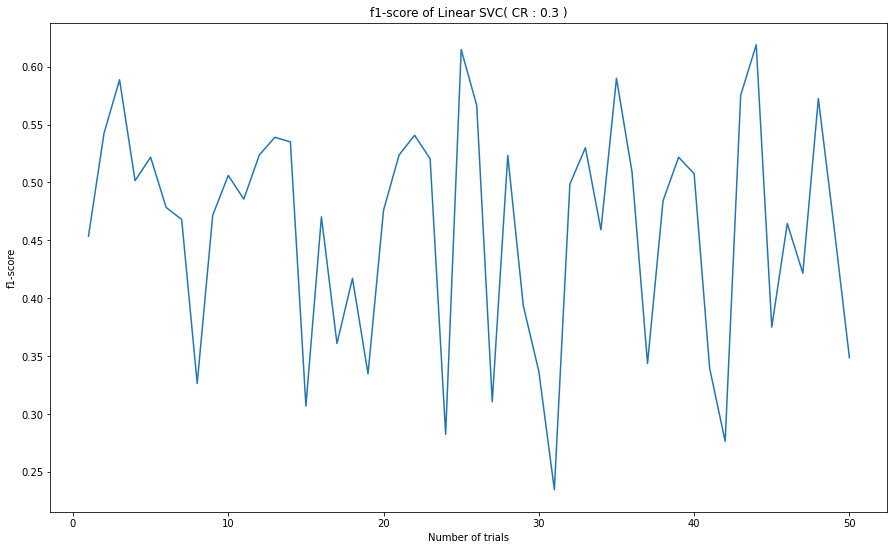

평균값 :  0.461
최댓값 :  0.6189 --> 44 번째 iteration
실행 시간 :  7.520239591598511 sec


In [ ]:
Validation_LinearSVC( df_card_selected , 50, 0.3 ) # 0.06

Logistic Regression

In [ ]:
def Validation_LogisticRegression( df, iter, alpha ) :

    start_time = time.time()

    df_copy = get_df_copy( df )

    X_train, X_test, y_train, y_test = split_train_test_dataset( df )
    
    df_card_train = pd.concat( [X_train, y_train], axis = 1 )
    df_card_Major = df_card_train[ df_card_train['Class'] == 0 ]
    df_card_minor = df_card_train[ df_card_train['Class'] == 1 ]

    result_f1 = [ ]

    for i in range( iter ) :
        
        df_card_Major_sample = df_card_Major.sample( ratio( alpha ) )

        df_unit = df_card_Major_sample.append( df_card_minor )

        f1_LR = get_model_evel( lr_clf, df_unit.iloc[ : , : -1 ], X_test, df_unit.iloc[ : , -1 ], y_test )

        #print( f1_LR )
        result_f1.append( f1_LR )
        


    plt.figure( figsize = ( 15, 9 ) )
    plt.plot( [ i+1 for i in range( len(result_f1) ) ], result_f1 )
    plt.xlabel( 'Number of trials' )
    plt.ylabel( 'f1-score' )
    plt.title( 'f1-score of Logistic Regression( CR : {A} )'.format( A = alpha ) )
    plt.show()
    print( '평균값 : ', round( statistics.mean( result_f1 ), 4 )  )
    print( '최댓값 : ', round( max( result_f1 ), 4 ), '-->', result_f1.index( max( result_f1 ) ) + 1, '번째 iteration' )
    print( "실행 시간 : ", time.time() - start_time,'sec' )

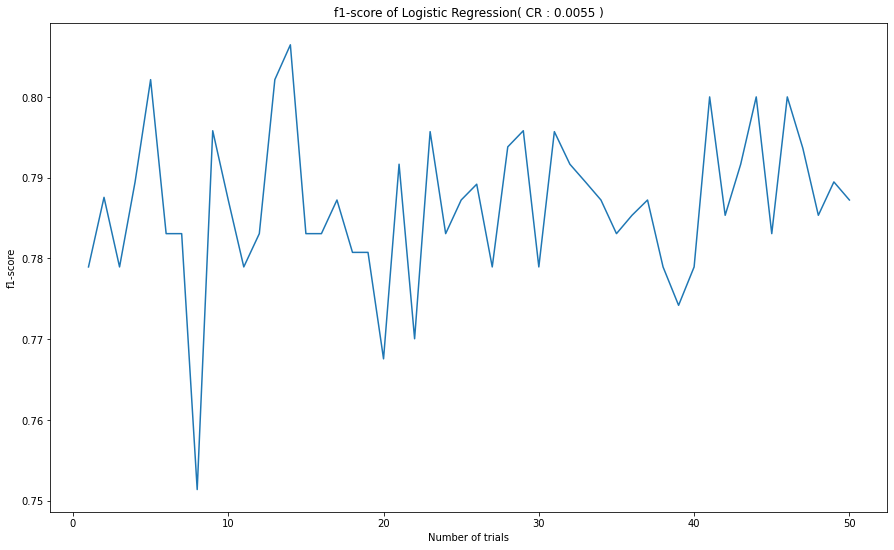

평균값 :  0.7865
최댓값 :  0.8065 --> 14 번째 iteration
실행 시간 :  38.672054290771484 sec


In [ ]:
Validation_LogisticRegression( df_card_selected , 50, 0.0055 )

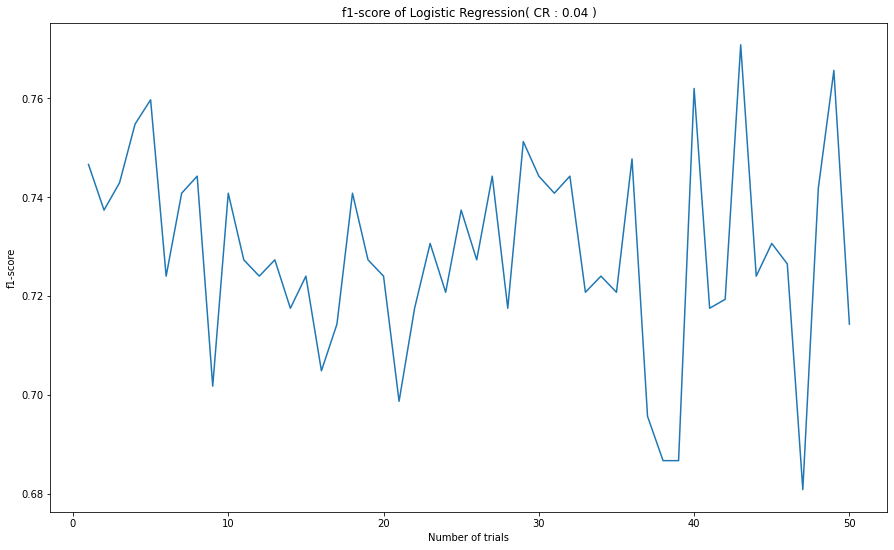

평균값 :  0.7287
최댓값 :  0.7707 --> 43 번째 iteration
실행 시간 :  11.157620191574097 sec


In [ ]:
Validation_LogisticRegression( df_card_selected , 50, 0.04 ) # 0.06

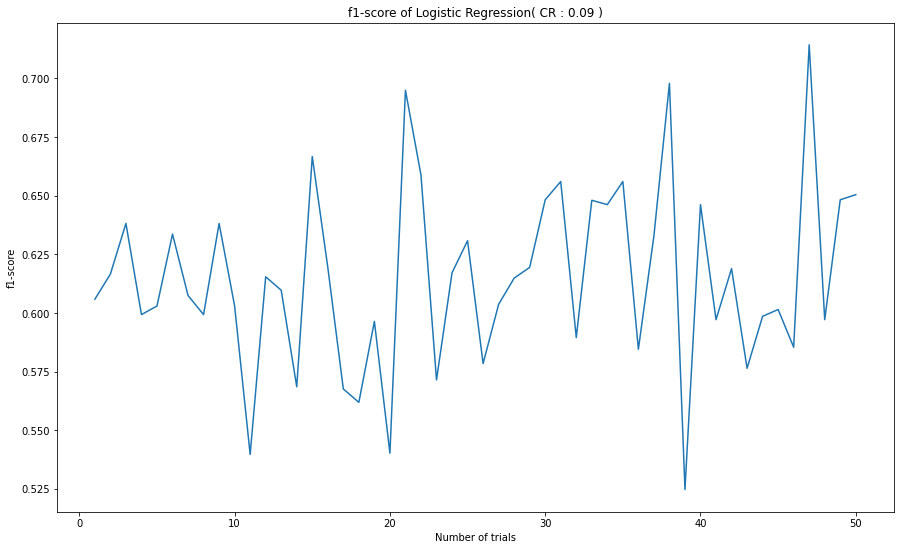

평균값 :  0.6147
최댓값 :  0.7143 --> 47 번째 iteration
실행 시간 :  9.493541955947876 sec


In [ ]:
Validation_LogisticRegression( df_card_selected , 50, 0.09 ) # 0.06

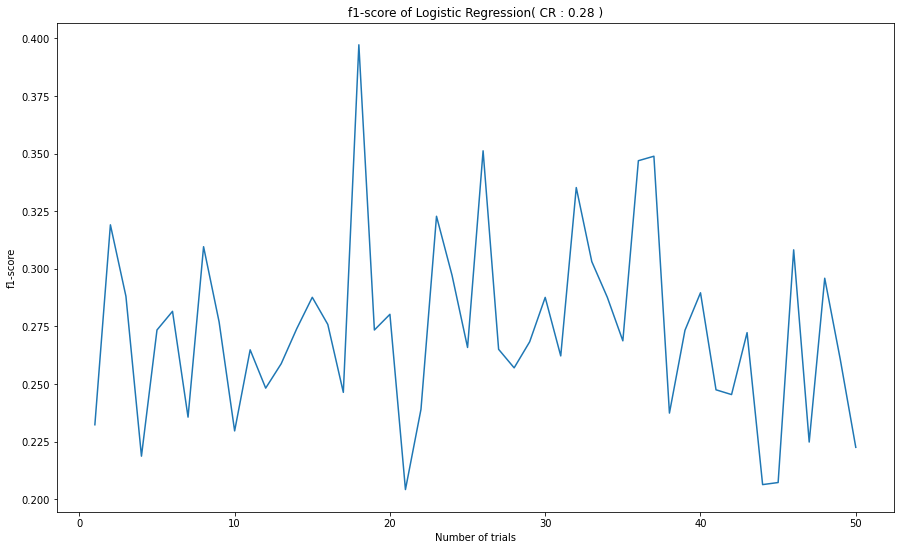

평균값 :  0.2735
최댓값 :  0.3973 --> 18 번째 iteration
실행 시간 :  8.255267143249512 sec


In [ ]:
Validation_LogisticRegression( df_card_selected , 50, 0.28)

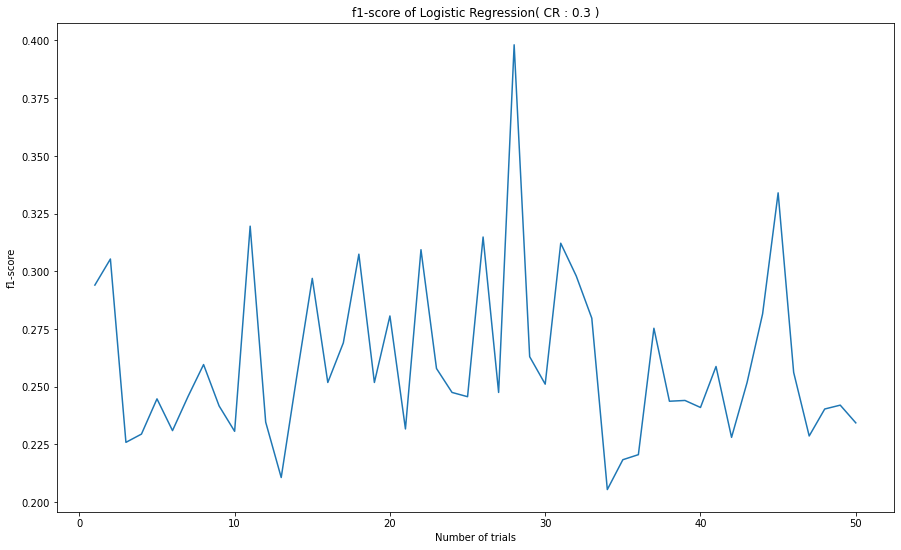

평균값 :  0.2609
최댓값 :  0.3981 --> 28 번째 iteration
실행 시간 :  8.316113710403442 sec


In [ ]:
Validation_LogisticRegression( df_card_selected , 50, 0.3 ) # 0.06

Random Forest(depth : 10)

In [ ]:
def Validation_RandomForest_10( df, iter, alpha ) :

    start_time = time.time()

    df_copy = get_df_copy( df )

    X_train, X_test, y_train, y_test = split_train_test_dataset( df )
    
    df_card_train = pd.concat( [X_train, y_train], axis = 1 )
    df_card_Major = df_card_train[ df_card_train['Class'] == 0 ]
    df_card_minor = df_card_train[ df_card_train['Class'] == 1 ]

    result_f1 = [ ]

    for i in range( iter ) :
        
        df_card_Major_sample = df_card_Major.sample( ratio( alpha ) )

        df_unit = df_card_Major_sample.append( df_card_minor )

        f1_RF = get_model_evel( rf_clf_depth10, df_unit.iloc[ : , : -1 ], X_test, df_unit.iloc[ : , -1 ], y_test )

        #print( f1_RF )
        result_f1.append( f1_RF )
        


    plt.figure( figsize = ( 15, 9 ) )
    plt.plot( [ i+1 for i in range( len(result_f1) ) ], result_f1 )
    plt.xlabel( 'Number of trials' )
    plt.ylabel( 'f1-score' )
    plt.title( 'f1-score of Random Forest(depth : 10)( CR : {A} )'.format( A = alpha ) )
    plt.show()
    print( '평균값 : ', round( statistics.mean( result_f1 ), 4 )  )
    print( '최댓값 : ', round( max( result_f1 ), 4 ), '-->', result_f1.index( max( result_f1 ) ) + 1, '번째 iteration' )
    print( "실행 시간 : ", time.time() - start_time,'sec' )

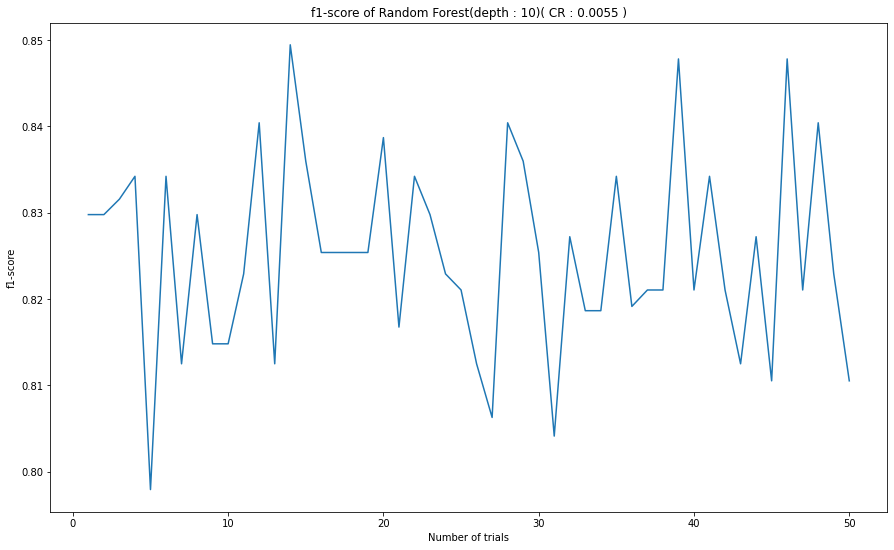

평균값 :  0.8252
최댓값 :  0.8495 --> 14 번째 iteration
실행 시간 :  1806.4924759864807 sec


In [ ]:
Validation_RandomForest_10( df_card_selected, 50, 0.0055 )

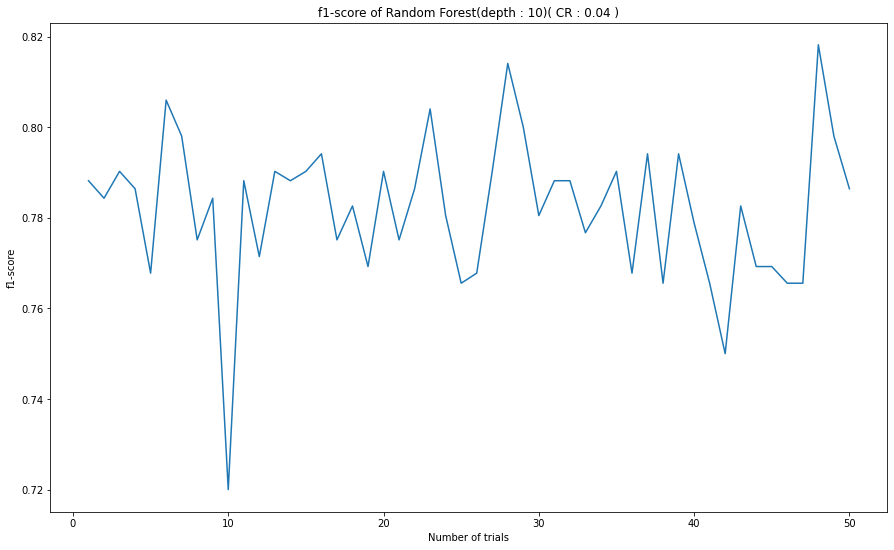

평균값 :  0.782
최댓값 :  0.8182 --> 48 번째 iteration
실행 시간 :  226.86278557777405 sec


In [ ]:
Validation_RandomForest_10( df_card_selected, 50, 0.04 ) # 0.06

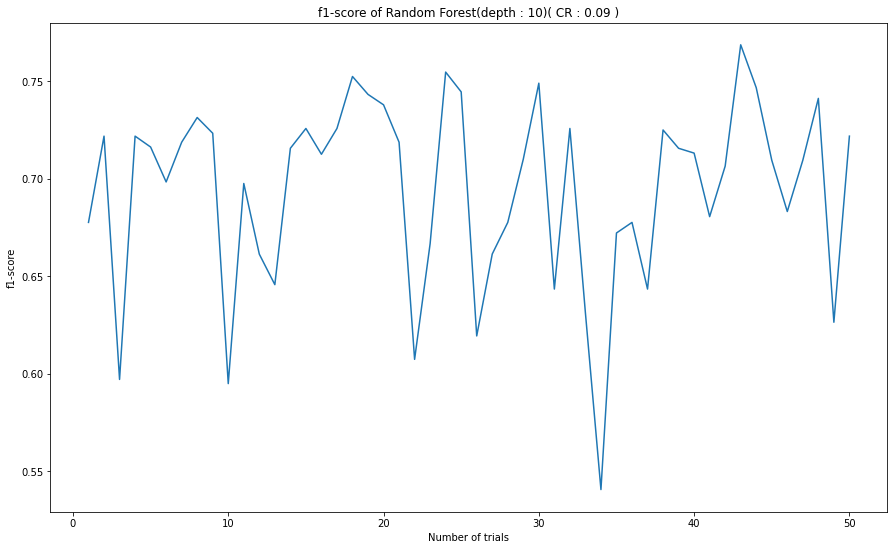

평균값 :  0.6941
최댓값 :  0.7685 --> 43 번째 iteration
실행 시간 :  115.51301407814026 sec


In [ ]:
Validation_RandomForest_10( df_card_selected, 50, 0.09 ) # 0.06

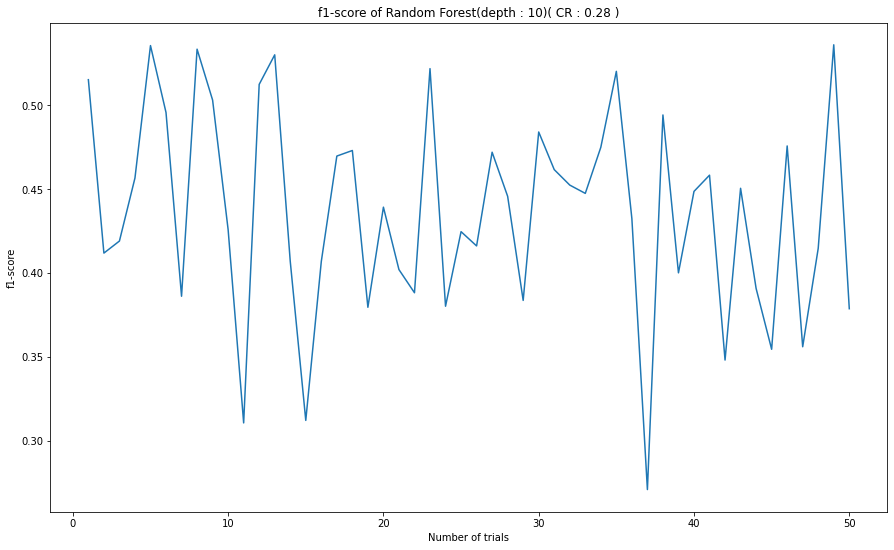

평균값 :  0.4361
최댓값 :  0.5359 --> 49 번째 iteration
실행 시간 :  61.15694069862366 sec


In [ ]:
Validation_RandomForest_10( df_card_selected, 50, 0.28) # 0.06

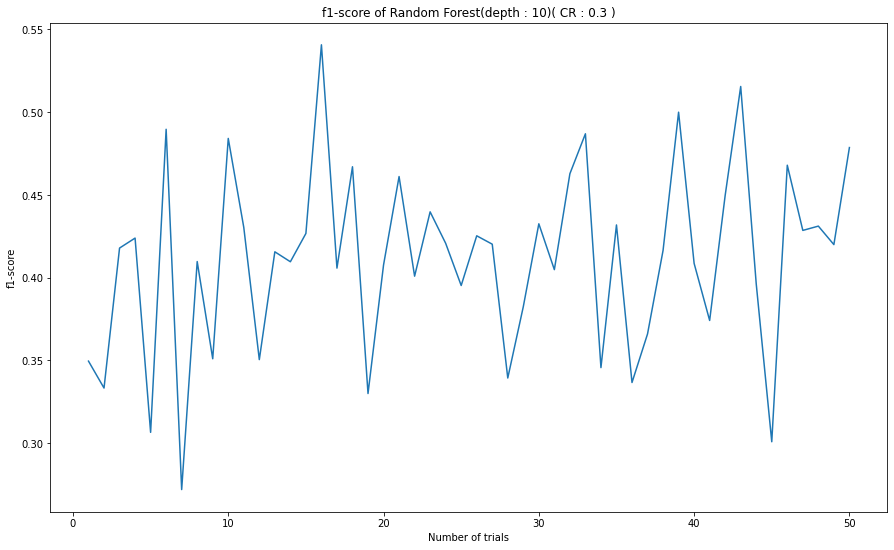

평균값 :  0.4113
최댓값 :  0.5407 --> 16 번째 iteration
실행 시간 :  59.8763701915741 sec


In [ ]:
Validation_RandomForest_10( df_card_selected, 50, 0.3 ) # 0.06

Random Forest( depth : 15)

In [ ]:
def Validation_RandomForest_15( df, iter, alpha ) :

    start_time = time.time()

    df_copy = get_df_copy( df )

    X_train, X_test, y_train, y_test = split_train_test_dataset( df )
    
    df_card_train = pd.concat( [X_train, y_train], axis = 1 )
    df_card_Major = df_card_train[ df_card_train['Class'] == 0 ]
    df_card_minor = df_card_train[ df_card_train['Class'] == 1 ]

    result_f1 = [ ]

    for i in range( iter ) :
        
        df_card_Major_sample = df_card_Major.sample( ratio( alpha ) )

        df_unit = df_card_Major_sample.append( df_card_minor )

        f1_RF = get_model_evel( rf_clf_depth15, df_unit.iloc[ : , : -1 ], X_test, df_unit.iloc[ : , -1 ], y_test )

        #print( f1_RF )
        result_f1.append( f1_RF )
        


    plt.figure( figsize = ( 15, 9 ) )
    plt.plot( [ i+1 for i in range( len(result_f1) ) ], result_f1 )
    plt.xlabel( 'Number of trials' )
    plt.ylabel( 'f1-score' )
    plt.title( 'f1-score of Random Forest(depth : 15)( CR : {A})'.format( A = alpha ) )
    plt.show()
    print( '평균값 : ', round( statistics.mean( result_f1 ), 4 )  )
    print( '최댓값 : ', round( max( result_f1 ), 4 ), '-->', result_f1.index( max( result_f1 ) ) + 1, '번째 iteration' )
    print( "실행 시간 : ", time.time() - start_time,'sec' )

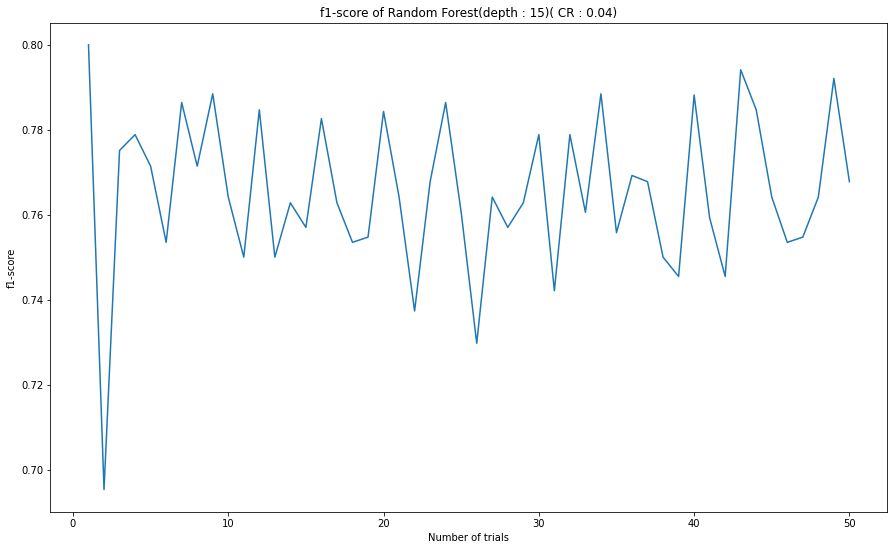

평균값 :  0.7652
최댓값 :  0.8 --> 1 번째 iteration
실행 시간 :  286.71687722206116 sec


In [ ]:
Validation_RandomForest_15( df_card_selected, 50, 0.04) # 0.06

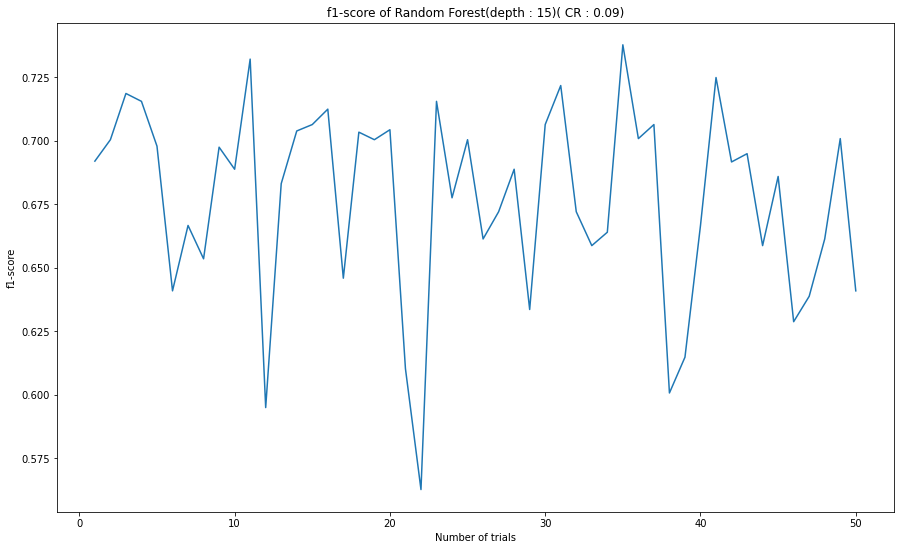

평균값 :  0.6772
최댓값 :  0.7378 --> 35 번째 iteration
실행 시간 :  141.69344925880432 sec


In [ ]:
Validation_RandomForest_15( df_card_selected, 50, 0.09) # 0.06

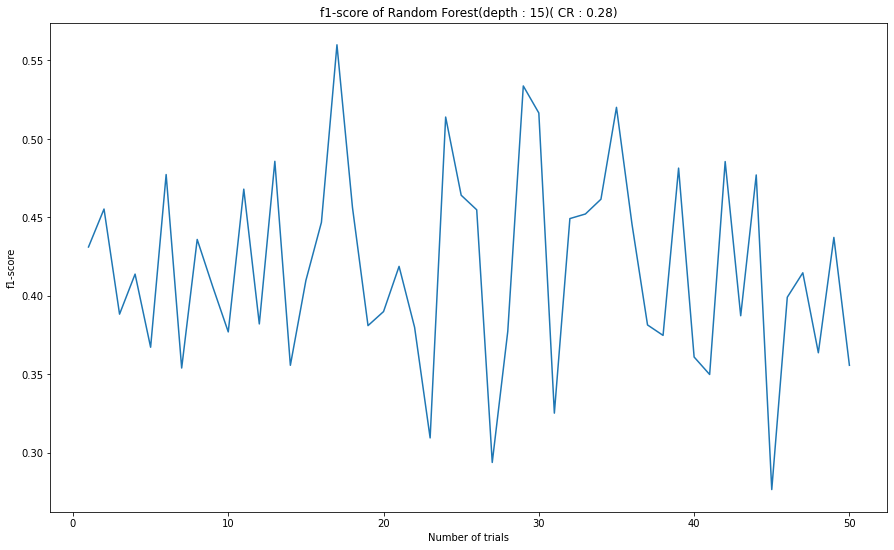

평균값 :  0.418
최댓값 :  0.56 --> 17 번째 iteration
실행 시간 :  67.23662829399109 sec


In [ ]:
Validation_RandomForest_15( df_card_selected, 50,0.28 ) # 0.06

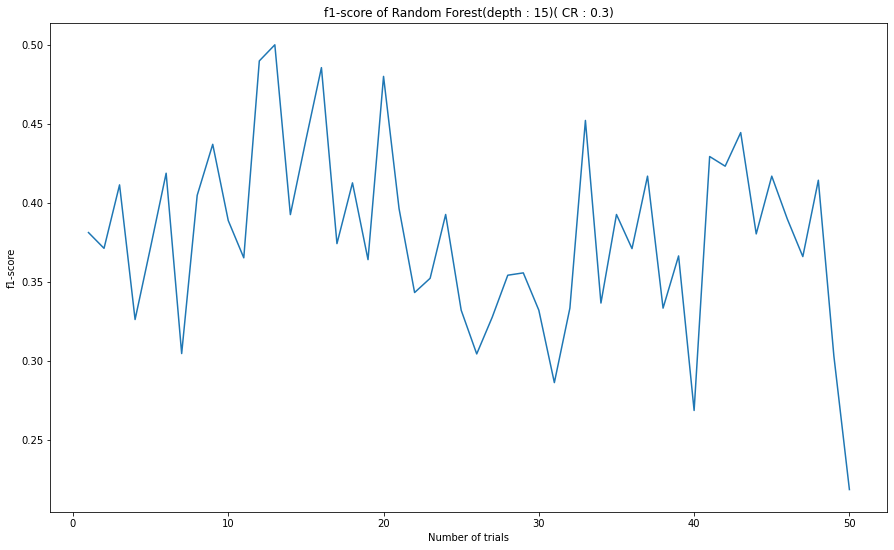

평균값 :  0.379
최댓값 :  0.5 --> 13 번째 iteration
실행 시간 :  69.42391204833984 sec


In [ ]:
Validation_RandomForest_15( df_card_selected, 50, 0.3 ) # 0.06